In [24]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

def analyze_single_sample(sample):
    # Display instruction evolution
    def display_instruction_evolution(instruction_data):
        html = f"<h3>Original Instruction: {instruction_data['original_instruction']}</h3>"
        html += "<table><tr><th>Stage</th><th>Input Instruction</th><th>Final Evolved Instruction</th></tr>"
        
        for stage in instruction_data['stages']:
            html += f"<tr><td>{stage['stage']}</td><td>{stage['input_instruction']}</td><td>{stage['final_evolved_instruction']}</td></tr>"
            
        html += f"<tr><td>Final</td><td colspan='2'>{instruction_data['final_instruction']}</td></tr>"
        html += "</table>"
        
        display(HTML(html))
    
    display_instruction_evolution(sample)
    
    # Word count analysis
    def word_count(text):
        return len(text.split())
    
    stage_word_counts = {0: word_count(sample['original_instruction'])}
    for i, stage in enumerate(sample['stages']):
        stage_word_counts[i+1] = word_count(stage['final_evolved_instruction'])
    # stage_word_counts[len(sample['stages'])] = word_count(sample['final_instruction'])
    
    plt.figure(figsize=(10, 6))
    plt.plot(list(stage_word_counts.keys()), list(stage_word_counts.values()), marker='o')
    plt.title('Word Count of Instructions by Stage')
    plt.xlabel('Stage (0: Original, 0 to N-1: Intermediate, N: Final)')
    plt.ylabel('Word Count')
    plt.xticks(range(0, len(sample['stages']) + 1))
    plt.grid(True)
    plt.show()
    
    # Display methods used in each stage
    def display_methods(instruction_data):
        html = "<h3>Methods Used in Each Stage</h3>"
        html += "<table><tr><th>Stage</th><th>Method</th></tr>"
        
        for stage in instruction_data['stages']:
            html += f"<tr><td>{stage['stage']}</td><td>{stage['optimized_method'][:500]}...</td></tr>"
        
        html += "</table>"
        
        display(HTML(html))
    
    display_methods(sample)
    
    # Display statistics
    num_stages = len(sample['stages'])
    print(f"Number of stages: {num_stages}")
    
    # Display evolved instructions and feedbacks
    for i, stage in enumerate(sample['stages']):
        print(f"\nStage {i + 1}")
        print("Evolved Instructions:")
        for j, instruction in enumerate(stage['evolved_instructions']):
            print(f"  {j + 1}. {instruction}")
        print("\nFeedbacks:")
        for j, feedback in enumerate(stage['feedbacks']):
            print(f"  {j + 1}. {feedback}")

    # Display final instruction
    print(f"\nFinal Instruction: {sample['final_instruction']}")

In [25]:
with open('/Users/qnguyen3/Downloads/the_tomb_evolved-3e_batch1.json', 'r') as f:
    data = json.load(f)

```Optimized Instruction
Step 1:
#Methods List#
1. Introduce proof by contradiction as an alternative method.
2. Require the identification of properties of integers used in the proof.
3. Ask for a real-world analogy to explain the relationship between a, b, k, and m.

Step 2:
#Plan#
1. Begin with a direct proof as in the original instruction.
2. Introduce proof by contradiction as an alternative method for verification.
3. Ask the student to identify and justify the properties of integers used in both proofs.
4. Conclude by asking for a real-world analogy that explains the relationship between a, b, k, and m.

Step 3:
#Rewritten Instruction Process#
Given $a|b \Rightarrow b = ka$ and $b|a \Rightarrow a = mb$, where $k$ and $m$ are integers, prove that $a = \pm b$ using both direct proof and proof by contradiction. Identify and justify the properties of integers used in your proofs.

Step 4:
#Review and Refinement Process#
Review the rewritten instruction to ensure it includes both pro

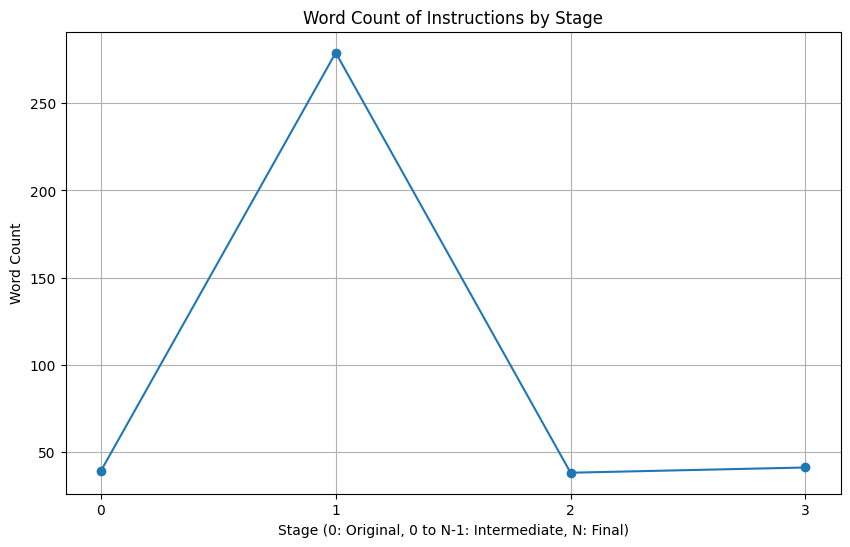

Stage,Method
1,"You are an Instruction Rewriter that rewrites the given #Instruction# into a more complex version. Please follow the steps below to rewrite the given ""#Instruction#"" into a more complex version. Step 1: To generate a list of methods to make instructions more complex, start by analyzing the core components of the original instruction. Identify key concepts, operations, and relationships. Brainstorm ways to introduce additional constraints, parameters, or conditions that require deeper understan..."
2,"You are an Instruction Rewriter that rewrites the given #Instruction# into a more complex version. Please follow the steps below to rewrite the given ""#Instruction#"" into a more complex version. Step 1: 1. Incorporate conditional scenarios that require the student to consider multiple possible outcomes or conditions. 2. Add a comparative analysis component, asking the student to compare and contrast different methods or approaches. 3. Introduce a self-assessment phase where the student evaluat..."
3,"You are an Instruction Rewriter that rewrites the given #Instruction# into a more complex version. Please follow the steps below to rewrite the given ""#Instruction#"" into a more complex version. Step 1: To make the instruction more complex, first compile a list of methods that enhance critical thinking, analytical skills, and problem-solving strategies. Include methods such as scenario-based learning, comparative analysis, self-assessment, and error prediction. Also, consider incorporating int..."


Number of stages: 3

Stage 1
Evolved Instructions:
  1. ```Optimized Instruction
Step 1:
#Methods List# 1. Introduce additional variables and conditions. 2. Request a detailed explanation for each step. 3. Ask for verification of the final result using a specific example. 4. Require the use of formal mathematical language and notation.

Step 2:
#Plan# Introduce an additional variable n, require a detailed explanation for each step, ask for verification using a specific example where a and b are non-zero integers, and insist on the use of formal mathematical language and notation.

Step 3:
#Rewritten Instruction# Prove, using formal mathematical language and notation, that for any non-zero integers a, b, and n, the statements $a|b$ and $b|a$ are equivalent to $a = \pm b$. Given $a|b \Rightarrow b = ka$ and $b|a \Rightarrow a = mb$, where k and m are integers, provide a detailed explanation for each step to demonstrate this relationship. Verify the final result using a specific example w

In [26]:
analyze_single_sample(data[-1])